# Pareto Distribution
## Во время решения данной задачи, я обнаружил, что уже существует распределение , для которого выполнены условия существование первых четырех моментов, а пятого - нет. Это распределение Парето с параметром k = 5,  $x_{m}$ = 1
Его плотность $p(x) =  
    p(x) = \left\{\begin{array}{lr}
        \frac{k \cdot x_{m}^k}{x^(k + 1)}, & \text{for } x \geq x_{m}\\
        0, & \text{for } x \leq x_{m}\\
        \end{array}\right\}$
        
Если мы будем считать 5-ый момент, то получим $E_{\xi^5} = \int_{1}^{+\infty} x^5 p(x) dx$ = $\int_{1}^{+\infty} x^5 \cdot \frac{5}{x^6} dx$ = $\int_{1}^{+\infty} \frac{5}{x} dx$ = 5$ \cdot lnx|^{+\infty}{_1} \to +\infty $ 
т.е. 5-ый момент не существует
аналогично, можно было самому придумать распределение с плотностью $p(x) = \frac{c}{x^6}$ Осталось лишь подобрать такую константу, чтобы интеграл по плотности был равен единицe

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import numpy as np
import random
import math
%matplotlib inline

Введем параметр равный 5

In [3]:
number_of_elements = 10 ** 4
pareto_b = 5

Снова функция для генерации цвета

In [4]:
symbols = ['0','1','2','3','4','5','6','7','8','9','a','b','c','d','e','f']
def color_generator() :
    col = '#'
    for i in range(6) :
        col += (symbols[random.randint(0, 15)])
    return col

In [5]:
selection = scipy.stats.pareto.rvs(pareto_b, size = number_of_elements)
selection

array([ 1.27151815,  1.31786408,  1.23605988, ...,  1.11461269,
        1.4457801 ,  1.03677584])

In [6]:
dots = [i for i in xrange(number_of_elements)]

In [7]:
dots_for_pdf = np.linspace(1, 4, number_of_elements)
dots_for_pdf

array([ 1.        ,  1.00030003,  1.00060006, ...,  3.99939994,
        3.99969997,  4.        ])

Построим график плотности распределения Парето и нанесем точки выборки на него

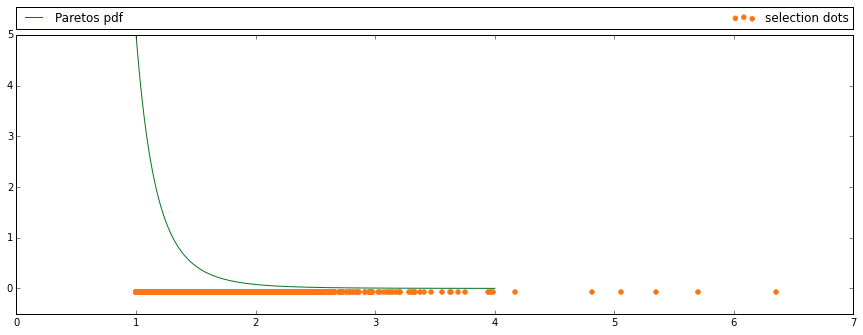

In [14]:
ylimit = 5
plt.figure(figsize=(15,5))
plt.plot(dots_for_pdf, [scipy.stats.pareto.pdf(x, pareto_b) for x in dots_for_pdf],\
         color = color_generator(), label = 'Paretos pdf')
plt.scatter(selection, number_of_elements * [0 - 1/16.], color = color_generator(), label = 'selection dots')
plt.ylim(-1/2.,ylimit)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
plt.show()

Производим подсчет выборочной дисперсии

In [15]:
squared_selection = [x ** 2 for x in selection]
pareto_var = scipy.stats.pareto.var(pareto_b)
pareto_var

0.10416666666666667

In [16]:
evals = [sum([x for x in squared_selection[number_of_elements - i - 1:]]) / (i + 1.)\
         - np.mean(selection[number_of_elements - i - 1:]) ** 2 for i in xrange(number_of_elements)]

In [17]:
dots = [i for i in xrange(number_of_elements)]

$f(\theta^*, \theta) = |\theta^* - \theta|$

Причем мы оцениваем модуль разности $S^2 - D_{x}$

In [18]:
def f(x, y) :
    return abs(x - y)

Строим график модуля разности 

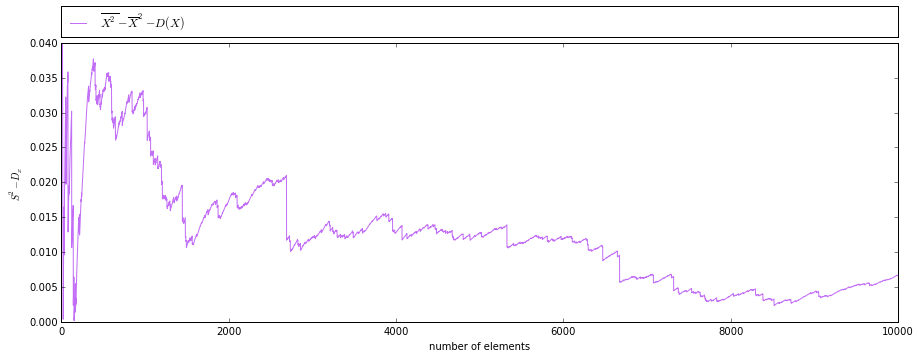

In [23]:
plt.figure(figsize=(15, 5))
plot = plt.plot(dots, [f(evals[i], pareto_var) for i in dots], color = color_generator(),\
                label = '$\overline{X^2} - \overline{X}^2 - D(X)$')
plt.ylim(0, 0.04)
plt.xlabel("number of elements")
plt.ylabel('$S^2 - D_{x}$')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
plt.show()

На графике видно, что при увеличении числа элементов, модуль разности все сильнее стремится к нулю

# Теперь приступим к Распределению Коши

Генерируем выборку

In [24]:
cauchy_selection = scipy.stats.cauchy.rvs(size = number_of_elements)
cauchy_selection


array([ 2.97632354,  3.15714678, -0.40785124, ...,  4.10375038,
        0.01053281, -0.70163348])

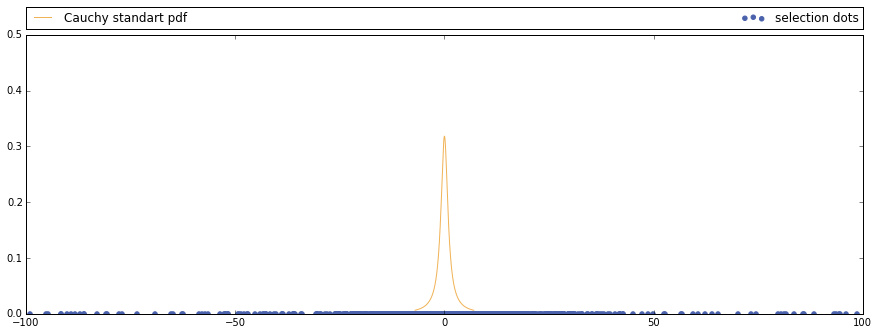

In [30]:
dots_for_cauchy_pdf = np.linspace(-7, 7, number_of_elements)
ylimit_new = 0.5
plt.figure(figsize=(15, 5))
plt.plot(dots_for_cauchy_pdf, [scipy.stats.cauchy.pdf(x) for x in dots_for_cauchy_pdf],\
         color = color_generator(), label = 'Cauchy standart pdf')
plt.scatter(cauchy_selection, number_of_elements * [0], color = color_generator(), label = 'selection dots')
plt.ylim(0,ylimit_new)
plt.xlim(-100, 100)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
plt.show()

Считаем выборочную дисперсию для распределения Коши

In [31]:
squared_cauchy_selection = map(lambda x : x ** 2, cauchy_selection)
cauchy_evals = [sum([x for x in squared_cauchy_selection[number_of_elements - i - 1:]]) / (i + 1)\
                - np.mean(cauchy_selection[number_of_elements - i - 1:]) ** 2 for i in xrange(number_of_elements)]

# Мы знаем, что у распределения Коши даже нет матожидания, это и объясняет такое поведение графика

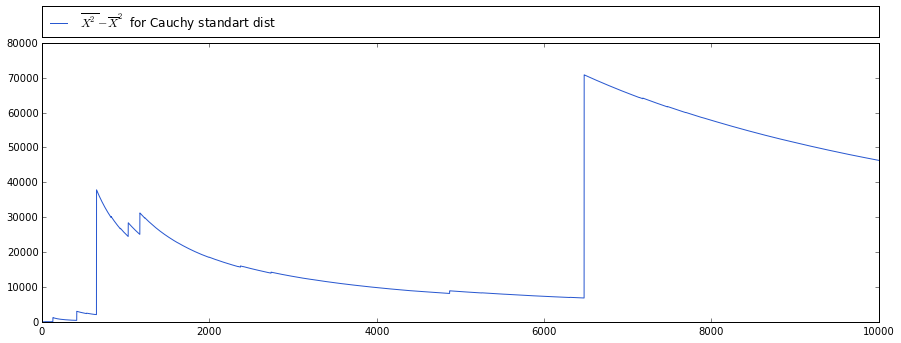

In [37]:
plt.figure(figsize=(15, 5))
plot = plt.plot(dots, [cauchy_evals[i] for i in dots], color = color_generator(),\
                label = '$\overline{X^2} - \overline{X}^2 $ for Cauchy standart dist')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
plt.show()